<h2>Exercise 1</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


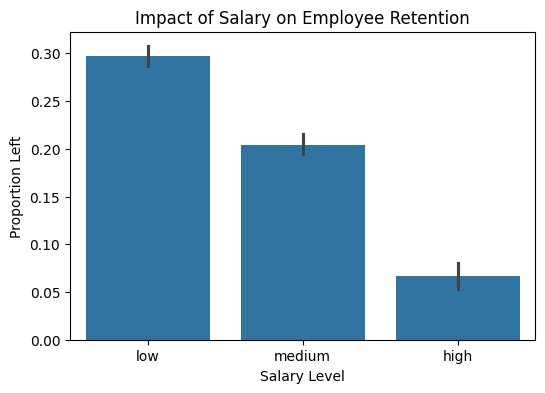

In [5]:
plt.figure(figsize=(6,4))
sns.barplot(x='salary', y='left', data=df)
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Proportion Left')
plt.show()

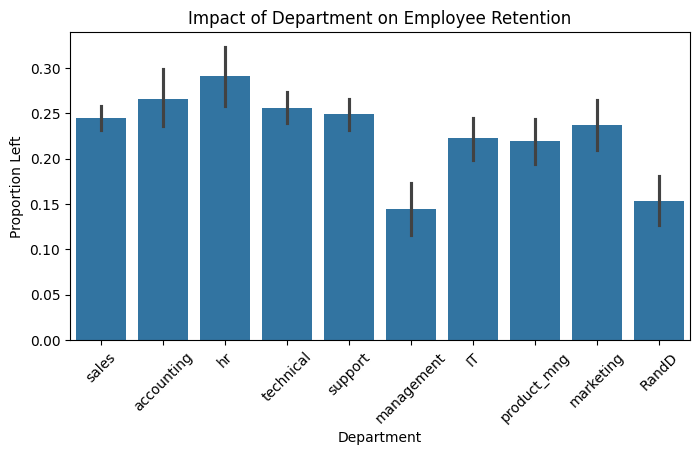

In [6]:
plt.figure(figsize=(8,4))
sns.barplot(x='Department', y='left', data=df)
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Proportion Left')
plt.xticks(rotation=45)
plt.show()

In [7]:
new_df = df[['satisfaction_level','salary','promotion_last_5years','time_spend_company', 'left']]
new_df.head()

,satisfaction_level,salary,promotion_last_5years,time_spend_company,left
0,0.38,low,0,3,1
1,0.80,medium,0,6,1
2,0.11,medium,0,4,1
3,0.72,low,0,5,1
4,0.37,low,0,3,1


In [8]:
new_df = pd.get_dummies(new_df, columns=['salary'])
new_df.head()

,satisfaction_level,promotion_last_5years,time_spend_company,left,salary_high,salary_low,salary_medium
0,0.38,0,3,1,False,True,False
1,0.80,0,6,1,False,False,True
2,0.11,0,4,1,False,False,True
3,0.72,0,5,1,False,True,False
4,0.37,0,3,1,False,True,False


In [9]:
new_df.salary_high.astype(int)
new_df.salary_low.astype(int)
new_df.salary_medium.astype(int)
new_df.info()
new_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   promotion_last_5years  14999 non-null  int64  
 2   time_spend_company     14999 non-null  int64  
 3   left                   14999 non-null  int64  
 4   salary_high            14999 non-null  bool   
 5   salary_low             14999 non-null  bool   
 6   salary_medium          14999 non-null  bool   
dtypes: bool(3), float64(1), int64(3)
memory usage: 512.8 KB


(14999, 7)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(new_df[['satisfaction_level', 'salary_high', 'salary_low', 'salary_medium', 'promotion_last_5years', 'time_spend_company']],new_df.left,train_size=0.8)

In [11]:
model = LogisticRegression()

In [12]:
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_predicted = model.predict(X_test)

In [14]:
model.predict_proba(X_test)

array([[0.56278132, 0.43721868],
       [0.96214564, 0.03785436],
       [0.94617521, 0.05382479],
       ...,
       [0.44868854, 0.55131146],
       [0.58083519, 0.41916481],
       [0.4554041 , 0.5445959 ]])

In [15]:
model.score(X_test,y_test)

0.77

In [16]:
model.coef_, model.intercept_

(array([[-3.68726083, -1.14206003,  0.7257949 ,  0.22925496, -1.47513057,
          0.20032034]]),
 array([-0.21492706]))

In [17]:
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_predicted, columns=['y_predicted'])

# Combine X_test, y_test, and predictions
final_df = pd.concat([X_test.reset_index(drop=True),
                      y_test_df,
                      y_pred_df],
                     axis=1)
final_df.head()

,satisfaction_level,salary_high,salary_low,salary_medium,promotion_last_5years,time_spend_company,left,y_predicted
0,0.37,False,True,False,0,3,1,0
1,0.99,False,False,True,0,2,0,0
2,0.89,False,False,True,0,2,0,0
3,0.94,False,True,False,0,2,0,0
4,0.67,False,True,False,0,3,0,0


In [18]:
final_df.tail()

,satisfaction_level,salary_high,salary_low,salary_medium,promotion_last_5years,time_spend_company,left,y_predicted
2995,0.41,False,False,True,0,3,1,0
2996,0.70,True,False,False,0,3,0,0
2997,0.30,False,True,False,0,4,0,1
2998,0.39,False,True,False,0,3,1,0
2999,0.39,False,False,True,0,8,0,1


In [19]:
correct_count = (y_test_df.iloc[:, 0] == y_pred_df['y_predicted']).sum()
incorrect_count = (y_test_df.iloc[:, 0] != y_pred_df['y_predicted']).sum()

print("Correct predictions:", correct_count)
print("Incorrect predictions:", incorrect_count)

Correct predictions: 2310
Incorrect predictions: 690
